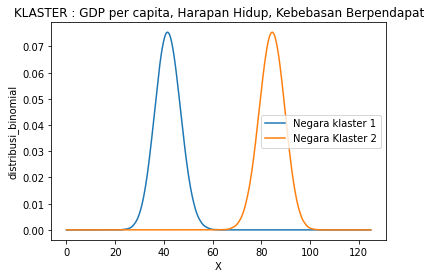

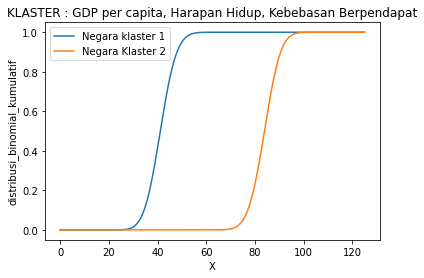

In [1]:
import math
import csv
import decimal
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def buka(nama):
    berkas = []                                      
    with open (nama+'.csv','r') as file:             
        brks = csv.reader(file)                       
        for i in brks:                                
            berkas.append(i)
    return berkas  

def tulis(nama, data_yg_mau_ditulis):
    with open (nama+'.csv','w',newline='') as file:    
        brks = csv.writer(file)                     
        brks.writerows(data_yg_mau_ditulis)


def faktorial(n):
    return math.factorial(int(n))

def cari_binomial(klaster, panjang_data, prob_sukses_klaster1, prob_gagal_klaster1, prob_sukses_klaster2, prob_gagal_klaster2):
    probabilitas = [[prob_sukses_klaster1,prob_gagal_klaster1],[prob_sukses_klaster2,prob_gagal_klaster2 ]]
    panjang_data = panjang_data
    x = 0
    indeks_klaster = klaster
    penampung = []
    for i in range(panjang_data):
        sukses = probabilitas[indeks_klaster][0]
        gagal = probabilitas[indeks_klaster][1]
        hasil = faktorial(panjang_data)/(faktorial(x)*faktorial(panjang_data-x))*((sukses**x)*(gagal**(panjang_data-x)))
        hasil = decimal.Decimal(hasil)
        penampung.append(hasil)
        x += 1
    return penampung


def distBinomial_transfer_ke_csv(binomial_klaster_1,binomial_klaster_2):
    def klaster(data):
        fix = []
        for i in data:
            hasil = '{0:.4f}'.format(i)
            fix.append(hasil)
        return fix
    binomial_klaster_1 = klaster(binomial_klaster_1)
    binomial_klaster_2 = klaster(binomial_klaster_2)
    binomial_fix       = zip(binomial_klaster_1,binomial_klaster_2)
    tulis('distribusi_binomial',binomial_fix)
        

def cari_binomial_kumulatif():
    def cari_kumulatif(klaster, berkas):
        fix = []
        data_sebelum = 0
        for i in berkas:
            asli = float(i[klaster])
            asli += data_sebelum
            i[klaster] = asli
            data_sebelum = asli
            hasil = decimal.Decimal(i[klaster])
            hasil = '{0:.4f}'.format(hasil)
            fix.append(hasil) 
        return fix
        
    berkas = buka('distribusi_binomial')
    binomial_kumulatif_klaster_1 = cari_kumulatif(0, berkas)
    binomial_kumulatif_klaster_2 = cari_kumulatif(1, berkas)
    binomial_kumulatif_fix       = zip(binomial_kumulatif_klaster_1,binomial_kumulatif_klaster_2)
    tulis('distribusi_binomial_kumulatif',binomial_kumulatif_fix)      




def grafik(jenis_dist, panjang_data):
    def pada_x():
        hasil = []
        for i in range(panjang_data):
            hasil.append(i)

        return hasil

    def pada_y(klaster, jenis_dist, panjang_data):
        hasil = []
        batas = 0
        berkas = buka(jenis_dist)
        for i in berkas:
            if batas == panjang_data:
                break
            hasil.append(i[klaster])
            batas += 1
        return hasil


    x = np.array(pada_x())
    y = np.array(pada_y(0,jenis_dist, panjang_data))
    cubic_interploation_model = interp1d(x, y, kind = "cubic")

    x1=np.linspace(x.min(), x.max(), 500)
    y1=cubic_interploation_model(x1)
    plt.plot(x1, y1, label = "Negara klaster 1")

    x = np.array(pada_x())
    y = np.array(pada_y(1, jenis_dist, panjang_data))
    cubic_interploation_model = interp1d(x, y, kind = "cubic")

    x1=np.linspace(x.min(), x.max(), 500)
    y1=cubic_interploation_model(x1)
    plt.plot(x1, y1, label = "Negara Klaster 2")

    plt.xlabel('X')
    plt.ylabel(jenis_dist)
    plt.title('KLASTER : GDP per capita, Harapan Hidup, Kebebasan Berpendapat')
    plt.legend()
    plt.show()




if __name__ == '__main__': #Semua Berawal disini
    panjang_data = 126

    prob_sukses_klaster1 = 0.330687831
    prob_gagal_klaster1 = 0.669312169
    prob_sukses_klaster2 = 0.669312169
    prob_gagal_klaster2 = 0.330687831

    # 0 = klaster1     1 = klaster2
    binomial_klaster_1 = cari_binomial(0, panjang_data, prob_sukses_klaster1, prob_gagal_klaster1, prob_sukses_klaster2, prob_gagal_klaster2)
    binomial_klaster_2 = cari_binomial(1, panjang_data, prob_sukses_klaster1, prob_gagal_klaster1, prob_sukses_klaster2, prob_gagal_klaster2)
    distBinomial_transfer_ke_csv(binomial_klaster_1, binomial_klaster_2)
    cari_binomial_kumulatif() 
    grafik('distribusi_binomial', panjang_data)
    grafik('distribusi_binomial_kumulatif', panjang_data)



